In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

year = 1990
    
#load dataset
base= pd.read_csv('../Data/WDIData.csv') #see downloads worldbank
base = base.drop(['Country Code', 'Indicator Code', 'Unnamed: 66'], axis=1) #name of column 'Unnamed: 66' may differ
    
#drop groups of countries
countries = pd.read_csv('additional_data/countries.csv').drop('Unnamed: 0', axis=1)
base = pd.merge(base, countries, how='left')
df = base.loc[base['Type'] != 'Region'].drop('Type', axis=1)
    
#keep only years 1990-2020
#df = base.set_index(['Country Name', 'Indicator Name'])

df = df[['Country Name', 'Indicator Name', str(year)]]
df = df.set_index(['Country Name', 'Indicator Name']).unstack()
df.columns = df.columns.droplevel(0)

In [37]:
#key_col = df.isna().sum().sort_values().index
#key_idx = df.T.isna().sum().sort_values().index

In [38]:
key_col

Index(['Renewable electricity output (% of total electricity output)',
       'Land area (sq. km)',
       'Population density (people per sq. km of land area)',
       'Surface area (sq. km)',
       'Adjusted savings: mineral depletion (current US$)',
       'Statistical performance indicators (SPI): Pillar 1 data use score (scale 0-100)',
       'Total fisheries production (metric tons)',
       'Capture fisheries production (metric tons)',
       'Access to electricity (% of population)',
       'Population growth (annual %)',
       ...
       'Net secondary income (Net current transfers from abroad) (constant LCU)',
       'Net official flows from UN agencies, UNWTO (current US$)',
       'Prevalence of severe food insecurity in the population (%)',
       'Prevalence of moderate or severe food insecurity in the population (%)',
       'Net official flows from UN agencies, UNTA (current US$)',
       'Plant species (higher), threatened',
       'Net official flows from UN agencie

In [51]:
df = df.reindex(key_idx)
df = df.T.reindex(key_col)

[]

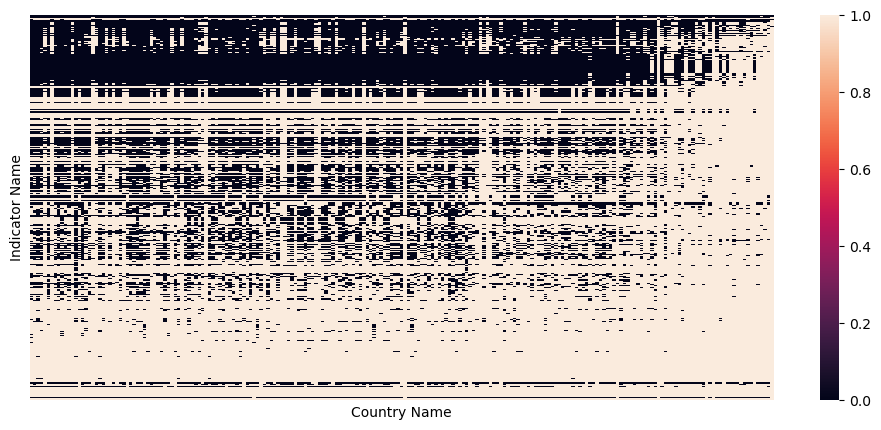

In [52]:
fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap(df.isnull(), cbar=True)
ax.set_xticks([])
ax.set_yticks([])